In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read dataset into a pandas dataframe
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
# describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [7]:
# check for any null values 
df.isnull().values.any()

False

In [9]:
df.shape

(2000, 9)

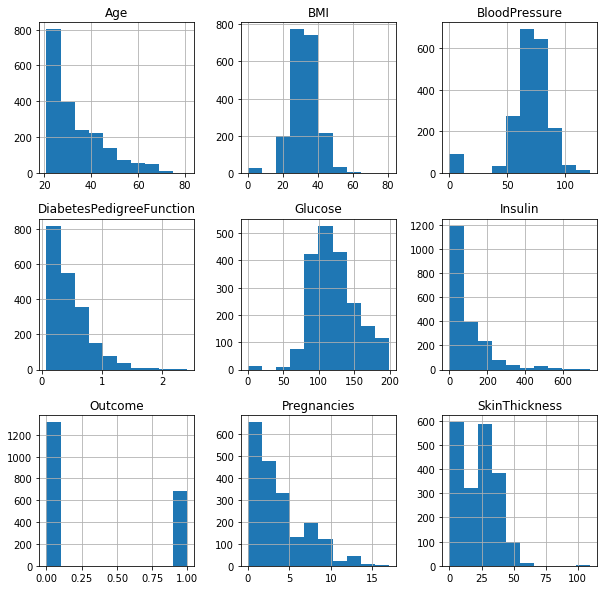

In [8]:
# display histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

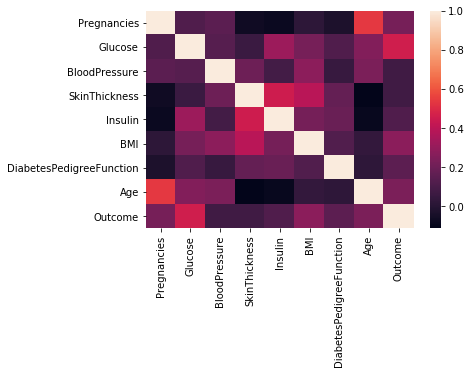

In [11]:
# find out correlation
sns.heatmap(df.corr())

It is evident that Skin Thickness, Insulin, Pregnencies and Age are full independent to each other. Age and Pregencies have negative correlation

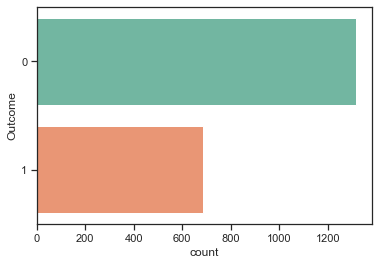

In [15]:
# count total outcome. 1 refers to patient with diabtes, 0 denotes patients with no diabetes
sns.countplot(y=df['Outcome'],palette='Set2')

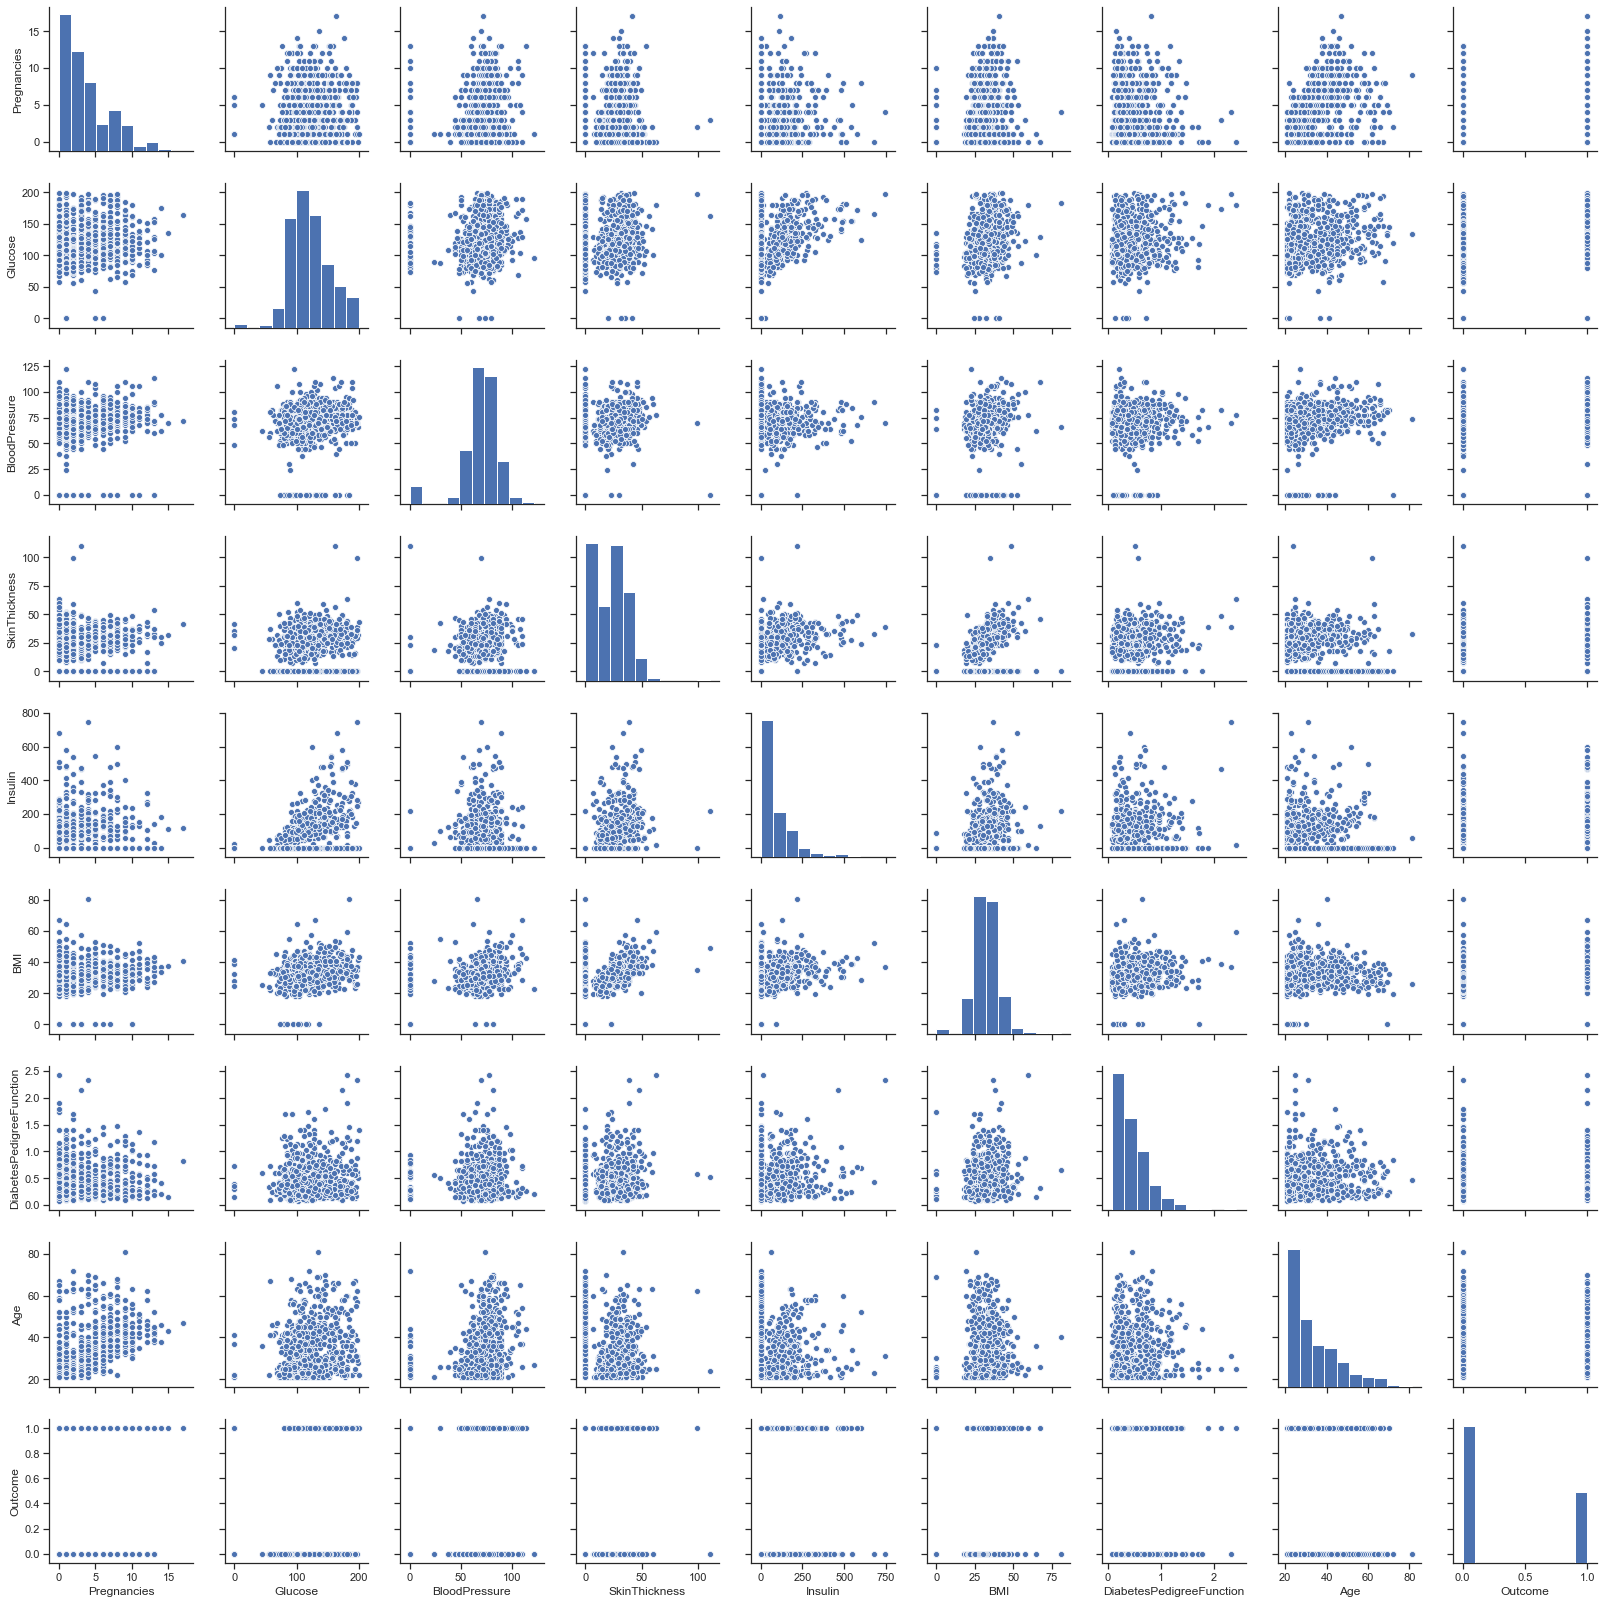

In [22]:
# display pairplot
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

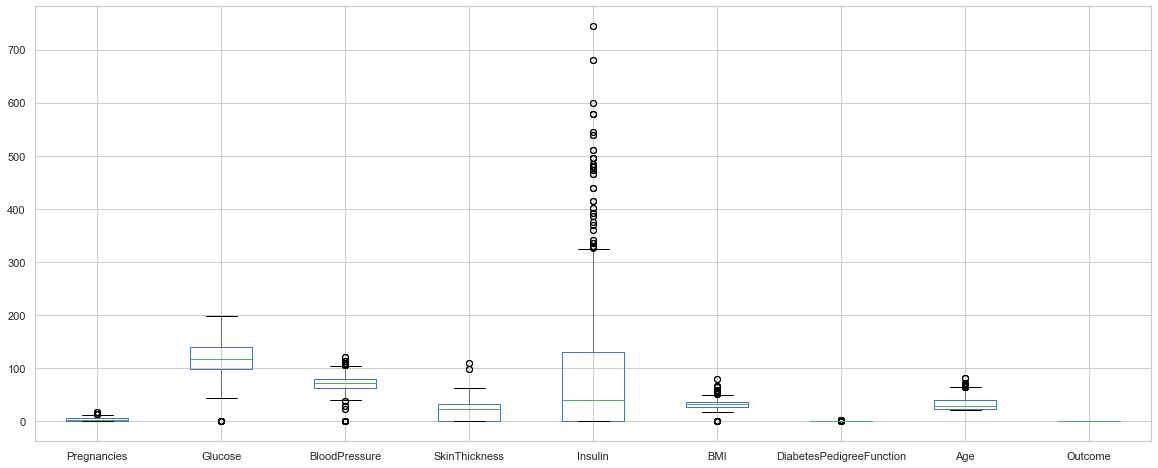

In [26]:
# create boxplot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(20,8))

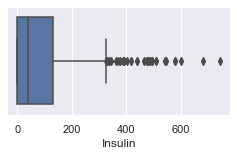

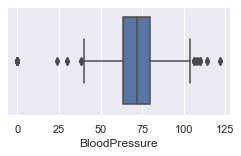

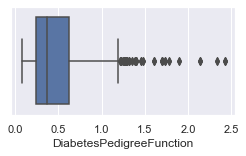

In [27]:
# display boxplots for specific features
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [33]:
print(df.shape)

(2000, 9)


In [30]:
# print info about quartile
Q1 = df.quartile(0.25)
Q3 = df.quartile(0.75)
IQR = Q3 - Q1

print("\n****Q1****\n",Q1)
print("\n****Q2****\n",Q3)
print("\n****IQR****\n",IQR)


****Q1****
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

****Q2****
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

****IQR****
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age            

In [36]:
# remove outlier 
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape,df_out.shape)

(2000, 9) (1652, 9)


In the above operation, 348 rows containing outliers got removed.

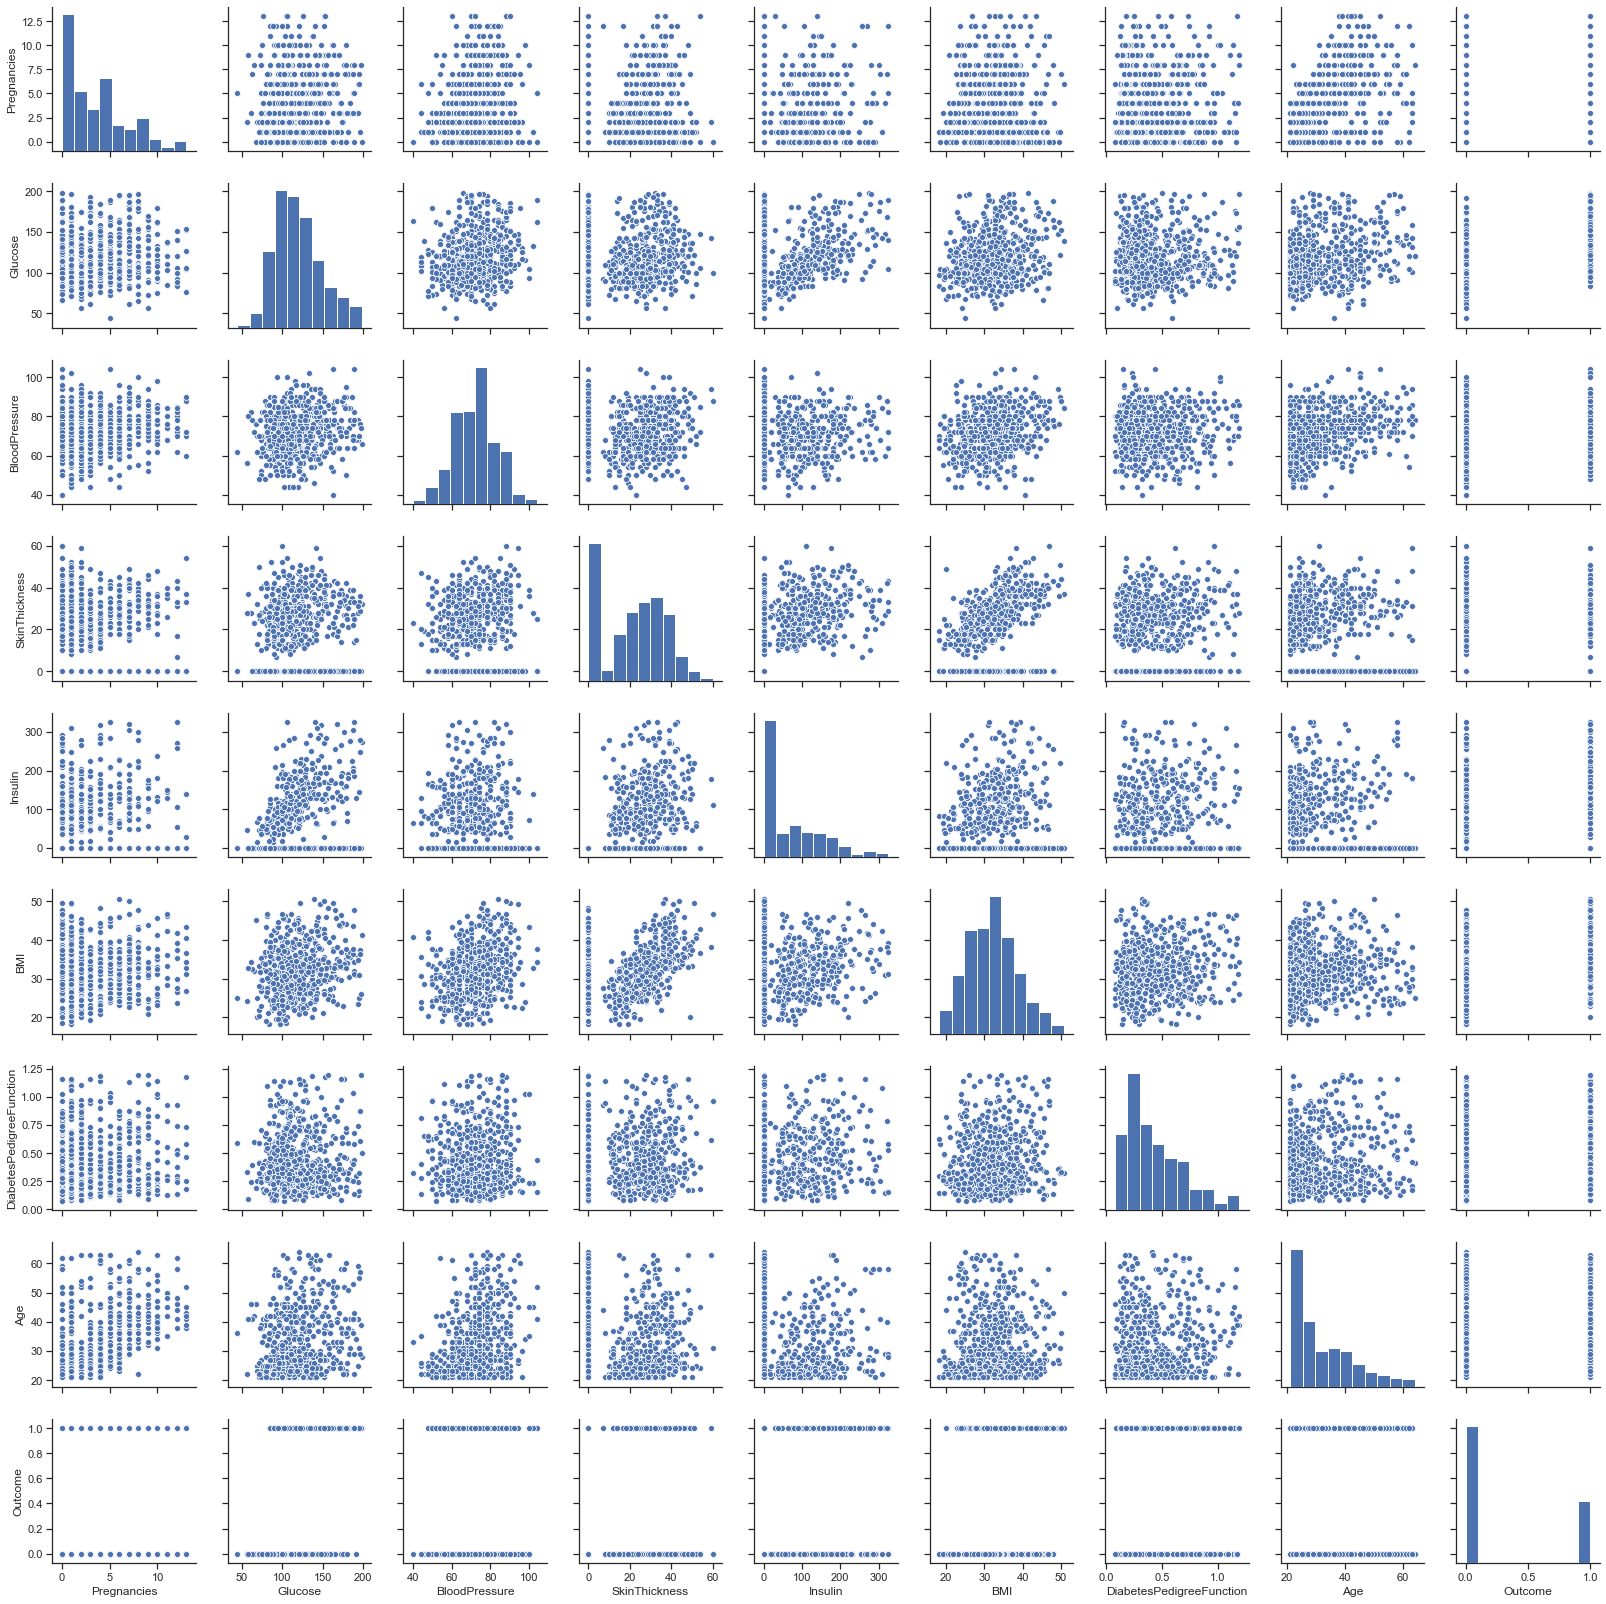

In [38]:
# display pairplot plot after removing outlier
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_out)
plt.show()

In [39]:
# extract features and targets
X = df_out.drop(['Outcome'], axis=1)
y = df_out['Outcome']

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
3,0,135,68,42,250,42.3,0.365,24
5,0,173,78,32,265,46.5,1.159,58
6,4,99,72,17,0,25.6,0.294,28


In [41]:
y.tail()

1994    0
1995    0
1996    1
1997    0
1999    0
Name: Outcome, dtype: int64

In [47]:
# split train and test data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [48]:
train_X.shape,train_y.shape,test_X.shape, test_y.shape

((1321, 8), (1321,), (331, 8), (331,))

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# for cross validation
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])